In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

obs = pd.read_csv('../Resources/monthly_obs.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
gfdl_member_stat = pd.read_csv('../Resources/gfdl_member_stat.csv')

nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
nasa_member_stat = pd.read_csv('../Resources/nasa_member_stat.csv')

canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada_member_stat = pd.read_csv('../Resources/canada_member_stat.csv')

canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm_member_stat = pd.read_csv('../Resources/canesm_member_stat.csv')

nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo_member_stat = pd.read_csv('../Resources/nemo_member_stat.csv')

cola_stat = pd.read_csv('../Resources/cola_stat.csv')
cola_member_stat = pd.read_csv('../Resources/cola_member_stat.csv')

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
ncep_member_stat = pd.read_csv('../Resources/ncep_member_stat.csv')

In [3]:
obs

,MON,NINO1+2_L3,NINO3_L3,NINO3.4_L3,NINO4_L3,SZN,VARIANCE1+2_L3,VARIANCE3_L3,VARIANCE3.4_L3,VARIANCE4_L3
0,2,25.717667,26.422444,26.859889,28.279111,JFM,0.633224,0.722083,0.911147,0.602424
1,3,26.041222,27.063111,27.284667,28.381778,FMA,0.687875,0.438982,0.569984,0.483076
2,4,25.479778,27.345222,27.678333,28.621556,MAM,0.969434,0.314258,0.338432,0.351696
3,5,24.358667,27.150444,27.826222,28.837556,AMJ,1.243217,0.300520,0.256750,0.272307
4,6,23.166333,26.558444,27.651111,28.928111,MJJ,1.278459,0.356976,0.281245,0.238351
5,7,22.029889,25.847444,27.291667,28.885333,JJA,1.215305,0.489432,0.401165,0.252990
6,8,21.230444,25.274778,26.955667,28.816111,JAS,1.155230,0.671820,0.576438,0.303363
7,9,20.918111,25.000333,26.763333,28.770111,ASO,1.097573,0.879021,0.797956,0.397474
8,10,21.135889,24.995222,26.712556,28.739667,SON,1.217331,1.143673,1.057599,0.521443
9,11,21.832889,25.104667,26.672667,28.665667,OND,1.309250,1.366630,1.304206,0.646976


In [4]:
#GFDL
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    filtered_gfdl = filtered_gfdl[['L','START','TARGET','SZN','MEAN_SST_GFDL_SPEAR']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl
    df1 = gfdl_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_GFDL_SPEAR']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_GFDL_SPEAR'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_GFDL_SPEAR'}, inplace=True)
    gfdl_stat_dfs[f'lead{lead}']['MEAN_ERR_GFDL_SPEAR'] = merged_df['MEAN_ERR_GFDL_SPEAR']
gfdl_stat_dfs['lead1']


,L,START,TARGET,SZN,MEAN_SST_GFDL_SPEAR,MEAN_ERR_GFDL_SPEAR
0,1.5,1,2,JFM,26.730966,-0.128923
1,1.5,2,3,FMA,27.219343,-0.065324
2,1.5,3,4,MAM,27.700019,0.021685
3,1.5,4,5,AMJ,27.778266,-0.047957
4,1.5,5,6,MJJ,27.458359,-0.192752
5,1.5,6,7,JJA,26.974693,-0.316974
6,1.5,7,8,JAS,26.671186,-0.284481
7,1.5,8,9,ASO,26.597937,-0.165396
8,1.5,9,10,SON,26.690056,-0.022500
9,1.5,10,11,OND,26.661196,-0.011470


In [5]:
#COLA
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
cola_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    filtered_cola = filtered_cola[['L','START','TARGET','SZN','MEAN_SST_COLA_CESM1']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    df1 = cola_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_COLA_CESM1']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_COLA_CESM1'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_COLA_CESM1'}, inplace=True)
    cola_stat_dfs[f'lead{lead}']['MEAN_ERR_COLA_CESM1'] = merged_df['MEAN_ERR_COLA_CESM1']
cola_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_COLA_CESM1,MEAN_ERR_COLA_CESM1
0,1.5,1,2,JFM,26.716516,-0.143373
1,1.5,2,3,FMA,27.143832,-0.140835
2,1.5,3,4,MAM,27.680017,0.001684
3,1.5,4,5,AMJ,27.869485,0.043263
4,1.5,5,6,MJJ,27.326014,-0.325097
5,1.5,6,7,JJA,26.523578,-0.768089
6,1.5,7,8,JAS,26.148790,-0.806877
7,1.5,8,9,ASO,25.895536,-0.867797
8,1.5,9,10,SON,26.219413,-0.493143
9,1.5,10,11,OND,26.507774,-0.164893


In [6]:
#Canada
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    filtered_canada = filtered_canada[['L','START','TARGET','SZN','MEAN_SST_CanSIPS_IC4']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_stat_dfs[f'lead{lead}'] = filtered_canada
    df1 = canada_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_CanSIPS_IC4']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_CanSIPS_IC4'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_CanSIPS_IC4'}, inplace=True)
    canada_stat_dfs[f'lead{lead}']['MEAN_ERR_CanSIPS_IC4'] = merged_df['MEAN_ERR_CanSIPS_IC4']
canada_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_CanSIPS_IC4,MEAN_ERR_CanSIPS_IC4
0,1.5,1,2,JFM,26.514067,-0.345822
1,1.5,2,3,FMA,26.901287,-0.383380
2,1.5,3,4,MAM,27.267670,-0.410663
3,1.5,4,5,AMJ,27.401857,-0.424366
4,1.5,5,6,MJJ,27.154027,-0.497084
5,1.5,6,7,JJA,26.719037,-0.572630
6,1.5,7,8,JAS,26.488720,-0.466947
7,1.5,8,9,ASO,26.235173,-0.528160
8,1.5,9,10,SON,26.199977,-0.512579
9,1.5,10,11,OND,26.201177,-0.471490


In [7]:
#CanESM
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canesm_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_stat[canesm_stat['L'] == i].copy()
    filtered_canesm = filtered_canesm[['L','START','TARGET','SZN','MEAN_SST_CanESM5']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_canesm.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canesm.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canesm = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canesm_stat_dfs[f'lead{lead}'] = filtered_canesm
    df1 = canesm_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_CanESM5']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_CanESM5'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_CanESM5'}, inplace=True)
    canesm_stat_dfs[f'lead{lead}']['MEAN_ERR_CanESM5'] = merged_df['MEAN_ERR_CanESM5']
canesm_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_CanESM5,MEAN_ERR_CanESM5
0,1.5,1,2,JFM,27.029653,0.169764
1,1.5,2,3,FMA,27.424380,0.139713
2,1.5,3,4,MAM,27.817160,0.138827
3,1.5,4,5,AMJ,27.936003,0.109781
4,1.5,5,6,MJJ,27.722560,0.071449
5,1.5,6,7,JJA,27.345373,0.053707
6,1.5,7,8,JAS,27.101530,0.145863
7,1.5,8,9,ASO,26.796750,0.033417
8,1.5,9,10,SON,26.682207,-0.030349
9,1.5,10,11,OND,26.619413,-0.053253


In [8]:
#NEMO
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
nemo_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_stat[nemo_stat['L'] == i].copy()
    filtered_nemo = filtered_nemo[['L','START','TARGET','SZN','MEAN_SST_GEM52_NEMO']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_nemo.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nemo.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nemo = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nemo_stat_dfs[f'lead{lead}'] = filtered_nemo
    df1 = nemo_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_GEM52_NEMO']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_GEM52_NEMO'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_GEM52_NEMO'}, inplace=True)
    nemo_stat_dfs[f'lead{lead}']['MEAN_ERR_GEM52_NEMO'] = merged_df['MEAN_ERR_GEM52_NEMO']
nemo_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_GEM52_NEMO,MEAN_ERR_GEM52_NEMO
0,1.5,1,2,JFM,25.998487,-0.861402
1,1.5,2,3,FMA,26.378197,-0.906470
2,1.5,3,4,MAM,26.718220,-0.960113
3,1.5,4,5,AMJ,26.867733,-0.958489
4,1.5,5,6,MJJ,26.585507,-1.065604
5,1.5,6,7,JJA,26.092733,-1.198933
6,1.5,7,8,JAS,25.875927,-1.079740
7,1.5,8,9,ASO,25.673623,-1.089710
8,1.5,9,10,SON,25.717770,-0.994786
9,1.5,10,11,OND,25.782963,-0.889703


In [9]:
#NCEP
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
ncep_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    filtered_ncep = filtered_ncep[['L','START','TARGET','SZN','MEAN_SST_NCEP_CFSv2']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep
    df1 = ncep_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_NCEP_CFSv2']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_NCEP_CFSv2'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_NCEP_CFSv2'}, inplace=True)
    ncep_stat_dfs[f'lead{lead}']['MEAN_ERR_NCEP_CFSv2'] = merged_df['MEAN_ERR_NCEP_CFSv2']
ncep_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_NCEP_CFSv2,MEAN_ERR_NCEP_CFSv2
0,1.5,1,2,JFM,26.866738,0.006849
1,1.5,2,3,FMA,27.219349,-0.065317
2,1.5,3,4,MAM,27.972402,0.294068
3,1.5,4,5,AMJ,28.262841,0.436618
4,1.5,5,6,MJJ,27.570029,-0.081082
5,1.5,6,7,JJA,26.603209,-0.688458
6,1.5,7,8,JAS,26.149263,-0.806404
7,1.5,8,9,ASO,25.929754,-0.833580
8,1.5,9,10,SON,26.258545,-0.454011
9,1.5,10,11,OND,26.706216,0.033549


In [10]:
#NASA
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
nasa_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    filtered_nasa = filtered_nasa[['L','START','TARGET','SZN','MEAN_SST_NASA_GEOSS2S']].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa
    df1 = nasa_stat_dfs[f'lead{lead}'][['SZN', 'MEAN_SST_NASA_GEOSS2S']]
    df2 = obs[['SZN', 'NINO3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['MEAN_SST_NASA_GEOSS2S'] - merged_df['NINO3.4_L3']
    merged_df.rename(columns={'Error': 'MEAN_ERR_NASA_GEOSS2S'}, inplace=True)
    nasa_stat_dfs[f'lead{lead}']['MEAN_ERR_NASA_GEOSS2S'] = merged_df['MEAN_ERR_NASA_GEOSS2S']
nasa_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_NASA_GEOSS2S,MEAN_ERR_NASA_GEOSS2S
0,1.5,1,2,JFM,26.541165,-0.318724
1,1.5,2,3,FMA,27.122570,-0.162096
2,1.5,3,4,MAM,27.798589,0.120256
3,1.5,4,5,AMJ,28.156845,0.330622
4,1.5,5,6,MJJ,27.886593,0.235482
5,1.5,6,7,JJA,27.328174,0.036507
6,1.5,7,8,JAS,26.836221,-0.119445
7,1.5,8,9,ASO,26.373424,-0.389910
8,1.5,9,10,SON,26.331512,-0.381044
9,1.5,10,11,OND,26.324688,-0.347979


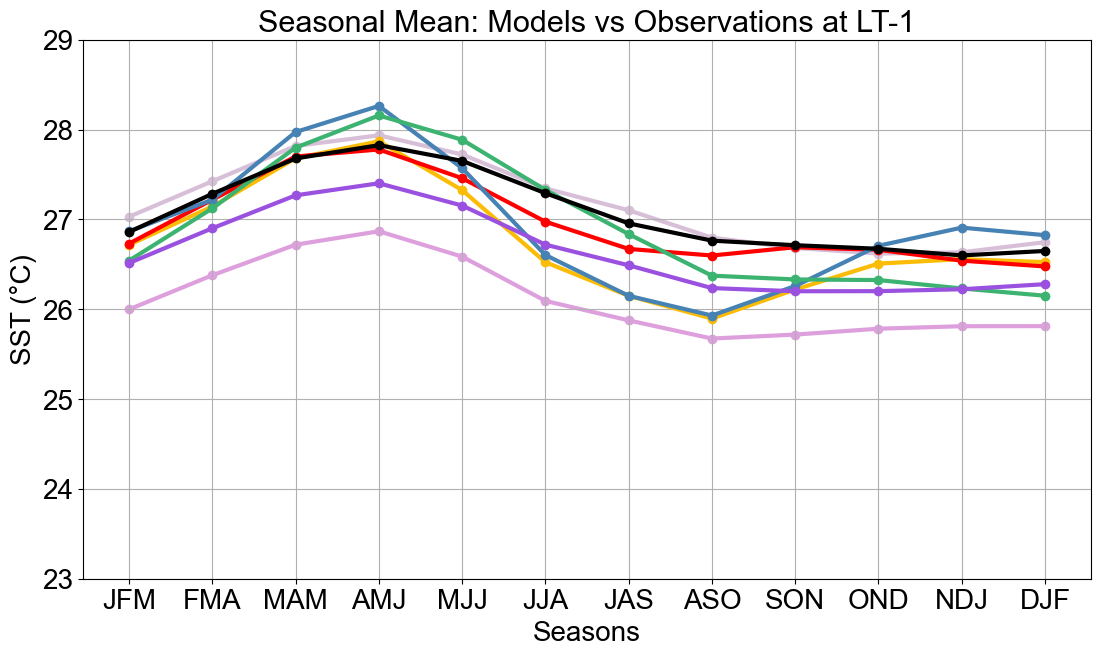

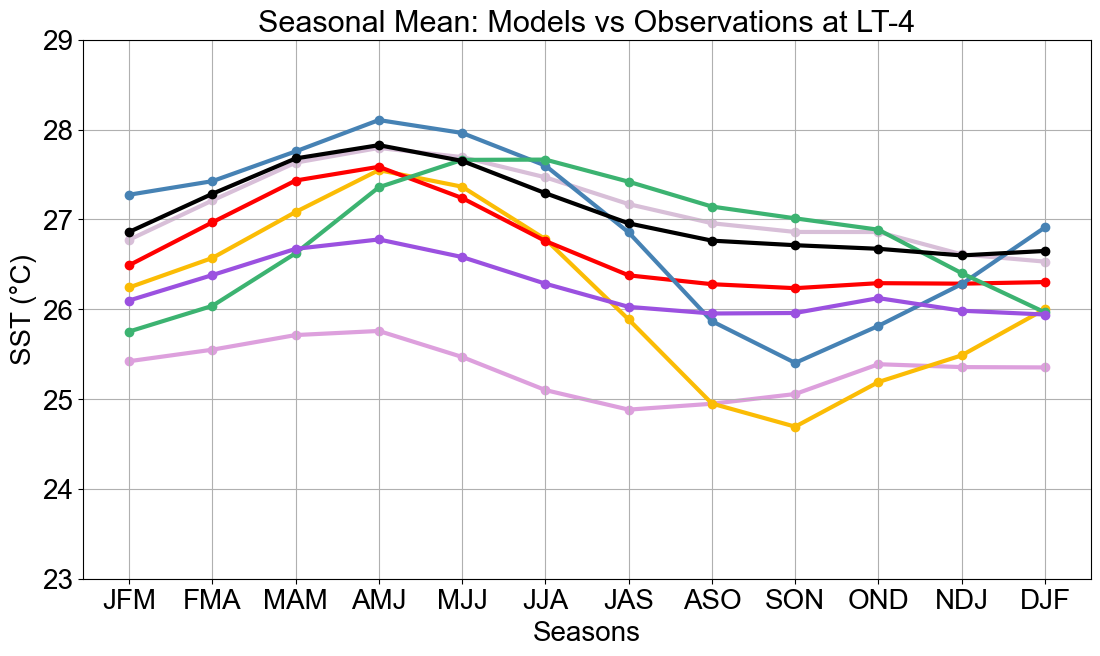

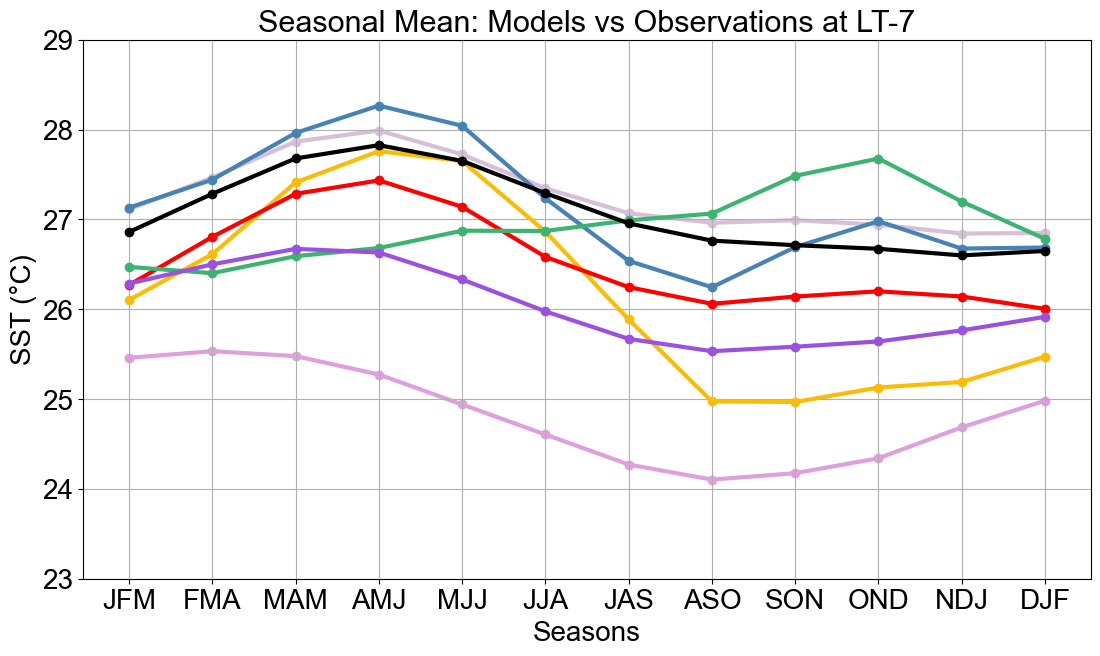

In [11]:
def multimodel_nino3_4_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO3.4_L3'], marker='o',markersize=6, linewidth=3, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean: Models vs Observations at LT-{lead}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/NEWMEAN/seasonal_mean_lead{lead}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {1,4,7}
for lead in leads:
    multimodel_nino3_4_visualizer(lead)



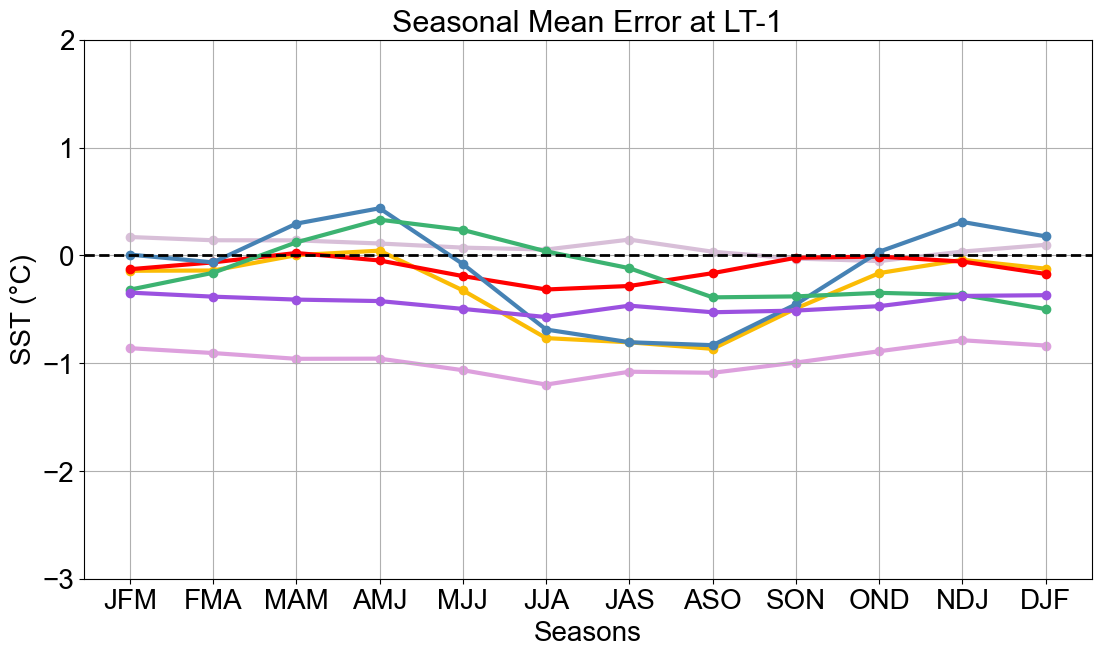

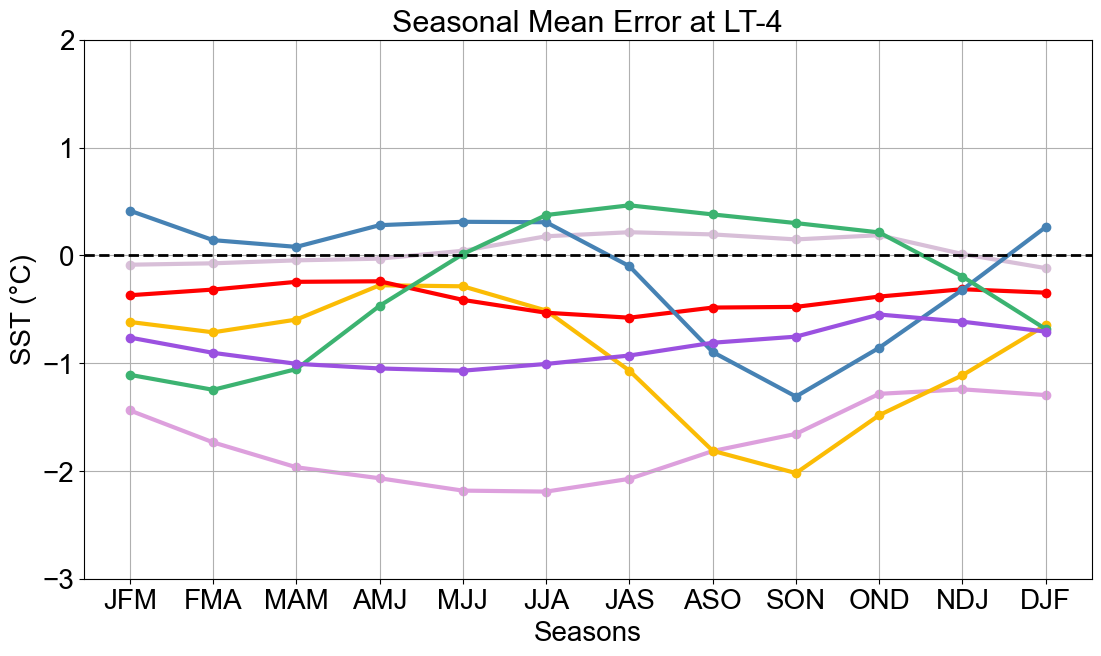

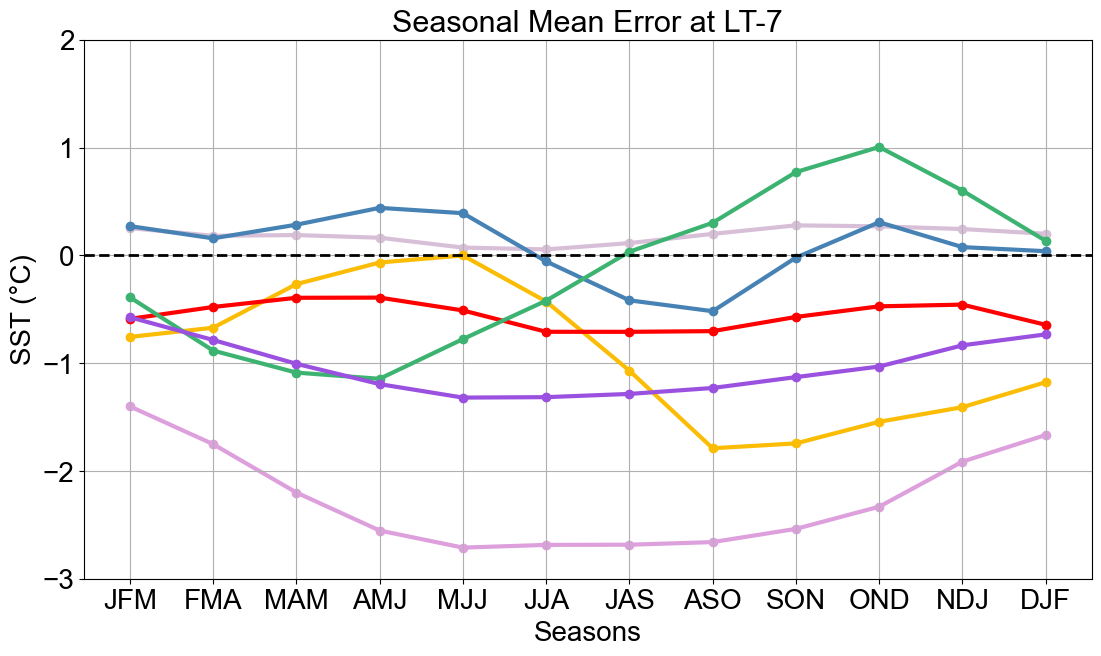

In [12]:
def multimodel_nino3_4_err_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_ERR_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_ERR_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_ERR_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_ERR_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_ERR_CanSIPS_IC4'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_ERR_GEM52_NEMO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_ERR_CanESM5'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    
    
    #Customize the plot
    plt.title(f'Seasonal Mean Error at LT-{lead}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.axhline(y=0, color='black', linewidth=2, linestyle = "--")
    #plt.legend(frameon=False)
    plt.ylim(ymin=-3, ymax=2)
    plt.savefig(f'../Plots/NEWMEAN/seasonal_mean_err_lead{lead}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {1,4,7}
for lead in leads:
    multimodel_nino3_4_err_visualizer(lead)



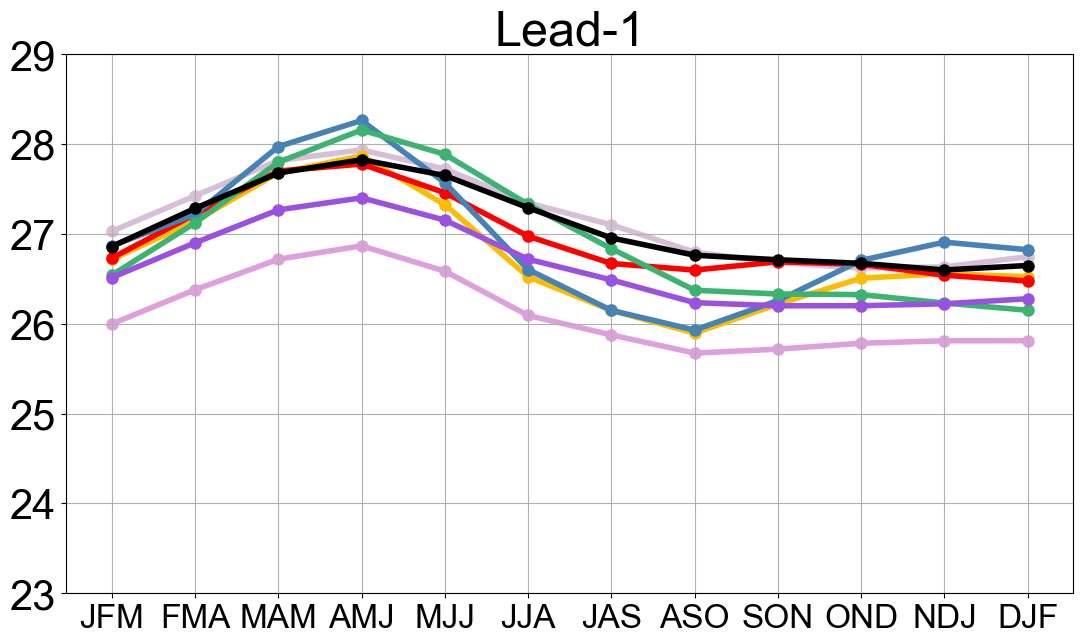

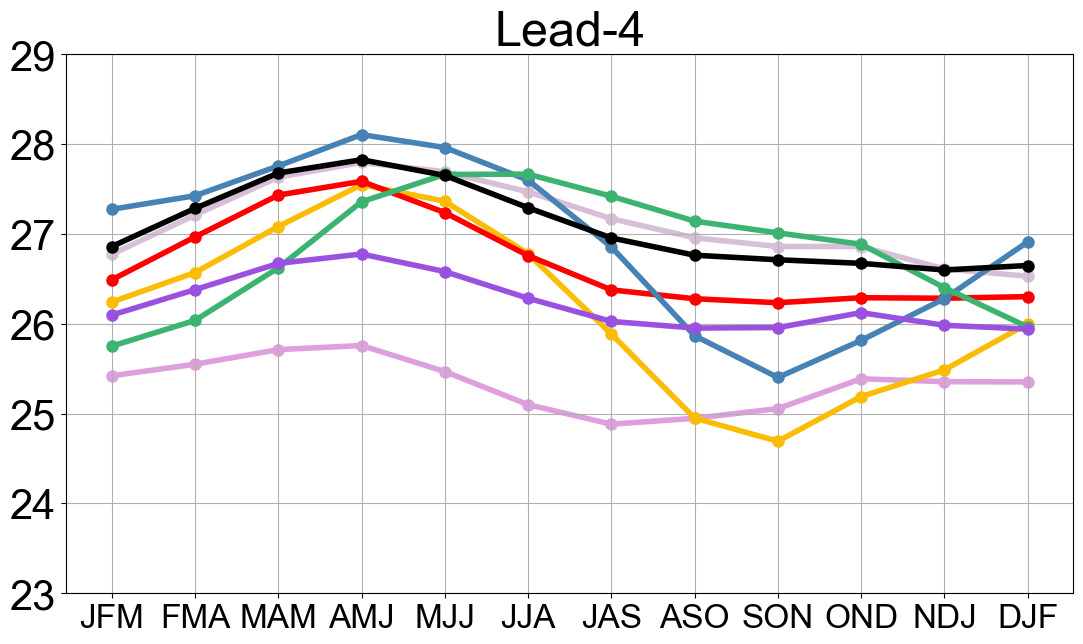

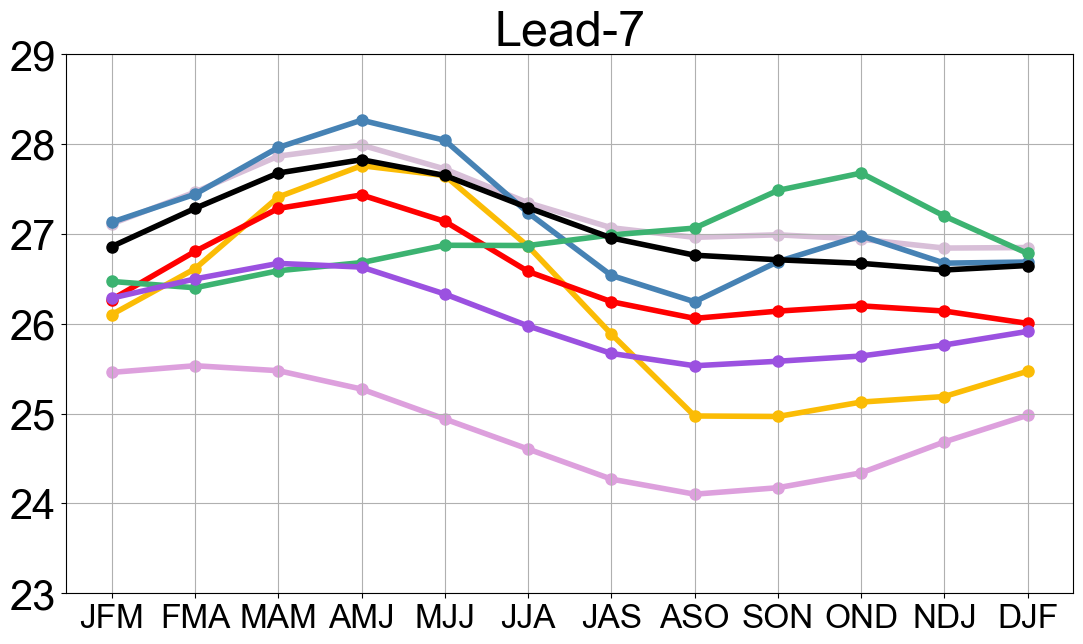

In [22]:
def multimodel_nino3_4_visualizer_PT(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=8, linewidth=4,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4'], marker='o',markersize=8, linewidth=4,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Lead-{lead}',size = 35)
    #plt.xlabel('Seasons', size = 20)
    #plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 24)
    plt.yticks(size = 30)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/NEWMEAN/PTseasonal_mean_lead{lead}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {1,4,7}
for lead in leads:
    multimodel_nino3_4_visualizer_PT(lead)


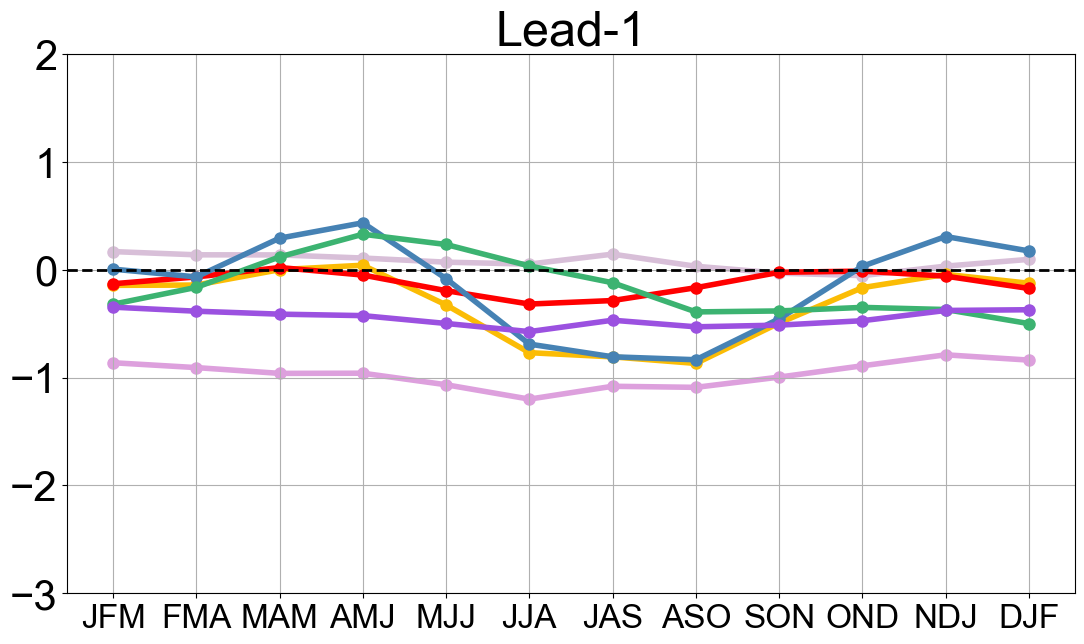

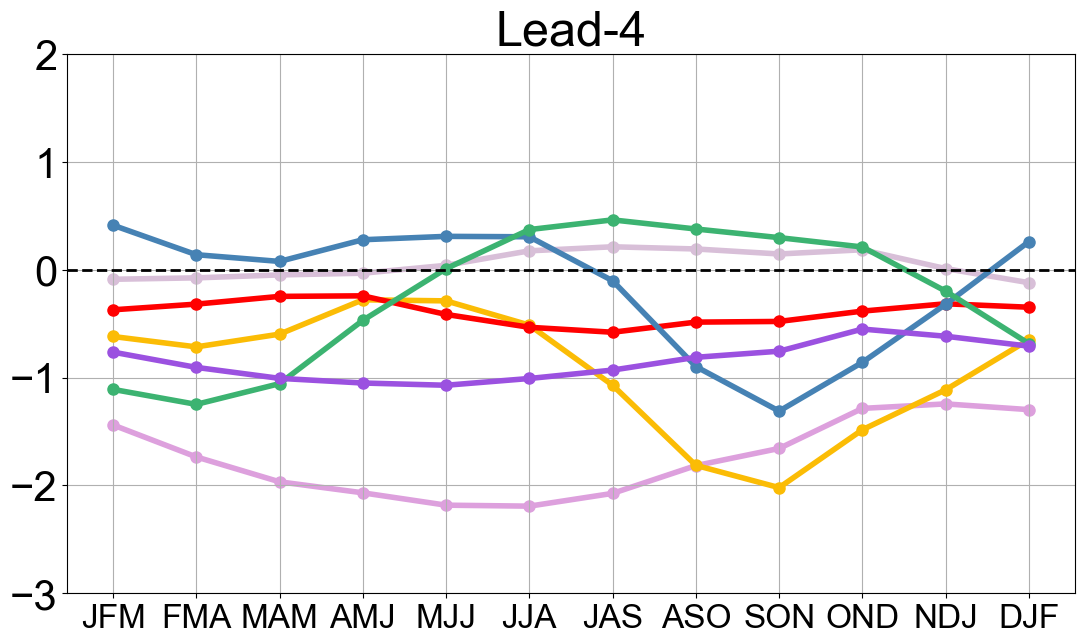

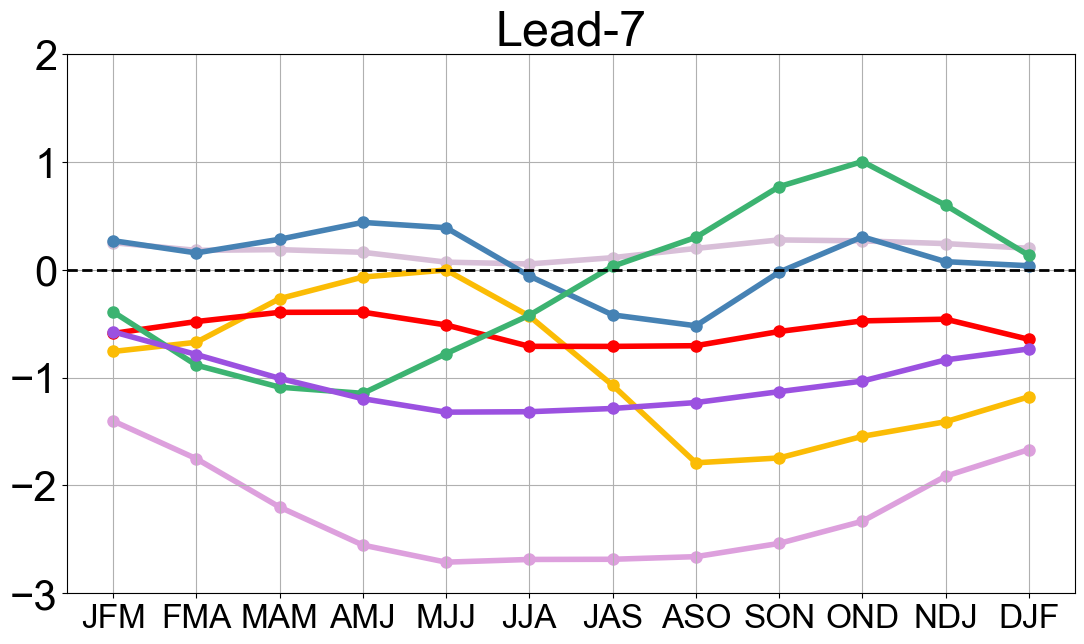

In [21]:
def PT_multimodel_nino3_4_err_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_ERR_COLA_CESM1'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_ERR_GFDL_SPEAR'], marker='o', markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_ERR_NCEP_CFSv2'], marker='o', markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_ERR_NASA_GEOSS2S'], marker='o',markersize=8, linewidth=4,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_ERR_CanSIPS_IC4'], marker='o',markersize=8, linewidth=4,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_ERR_GEM52_NEMO'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_ERR_CanESM5'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    
    
    #Customize the plot
    plt.title(f'Lead-{lead}',size = 35)
    #plt.xlabel('Seasons', size = 20)
    #plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 24)
    plt.yticks(size = 30)
    plt.grid(True)
    plt.axhline(y=0, color='black', linewidth=2, linestyle = "--")
    #plt.legend(frameon=False)
    plt.ylim(ymin=-3, ymax=2)
    plt.savefig(f'../Plots/NEWMEAN/PT_seasonal_mean_err_lead{lead}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {1,4,7}
for lead in leads:
    PT_multimodel_nino3_4_err_visualizer(lead)

